# High-Level Concepts Notes on Building AI Agents with LangChain

## What Are AI Agents?
- **Purpose**: AI agents solve complex, multi-step problems that require planning, decision-making, and execution, reducing user effort.
- **Problem Illustration**:
  - Example: Planning a trip from Delhi to Goa (May 1–7).
  - Tasks involved:
    1. **Booking Tickets**: Use platforms like MakeMyTrip or IRCTC to book train/flight tickets (e.g., select dates, class, and confirm availability).
    2. **Hotel Booking**: Search for hotels in Goa, filter by check-in/out dates, budget, reviews, and amenities, then book.
    3. **Itinerary Planning**: Research top attractions (beaches, forts, parties), build a daily itinerary, and arrange local transport (e.g., cabs or rentals).
  - Challenges:
    - Time-consuming (days of research and decision-making).
    - Involves multiple platforms, data aggregation, payments, and clarifications (e.g., hotel calls/emails).
    - Difficult for non-tech-savvy users (e.g., elderly) due to complex website interactions.
  - **Problem Statement**: Current websites lack a natural, seamless interaction method, requiring significant user effort for planning and execution.
- **AI Agent Solution**:
  - AI agents simplify the process by autonomously handling planning and execution.
  - Example Workflow (Goa Trip with AI Agent on MakeMyTrip):
    1. **User Input**: “Create a budget travel itinerary from Delhi to Goa from May 1 to May 7.”
    2. **Agent Actions**:
       - **Understands Intent**: Identifies travel dates, destination, and budget preference.
       - **Sets Internal Goal**: Plan a cost-optimized itinerary including travel, stay, and activities.
       - **Executes Steps**:
         - **Travel**: Queries IRCTC/flight APIs for cheapest options (e.g., Goa Express train, ₹800 sleeper/₹1500 3AC). Suggests options to user; books 3AC upon confirmation.
         - **Stay**: Queries hotel APIs, filters for budget hotels near beaches (e.g., ₹650/night hostel). Books upon user approval.
         - **Local Transport**: Suggests scooter rental (₹300/day, ₹1800 for 6 days) for budget travel; books upon approval.
         - **Itinerary**: Queries knowledge base/APIs for popular attractions, plans daily activities (e.g., beaches on Day 1, churches on Day 2). Adjusts based on user preferences.
         - **Return Travel**: Suggests return options (e.g., train at ₹800/₹1500 or flight at ₹2800); books train upon selection.
       - **Summarizes Costs**: Provides budget breakdown (e.g., ₹3000 train, ₹3900 stay, ₹1800 scooter, ≈₹14,000 total).
       - **Handles Payments**: Uses saved card details and payment APIs to book tickets, hotels, etc., sending invoices to user’s email.
       - **Calendar Integration**: Adds trip details (e.g., train times, hotel check-in) to user’s calendar with reminders.
       - **Adaptability**: Adjusts plans if user changes preferences (e.g., prefers flight over train).
    3. **User Experience**: Seamless; user only provides high-level goal and approvals, with minimal effort compared to manual planning.
  - **Key Benefit**: AI agents make complex tasks accessible, especially for users unfamiliar with technology, by automating multi-step processes.

---

## Technical Definition of AI Agents
- **Definition**: An AI agent is an intelligent system that:
  - Receives a high-level goal from a user.
  - Autonomously plans, decides, and executes a sequence of actions using external tools, APIs, and knowledge sources.
  - Maintains context, reasons over multiple steps, adapts to new information, and optimizes for the intended outcome.
- **Simple Explanation**:
  - User provides a goal (e.g., “Plan a budget Goa trip”).
  - Agent uses its “brain” (reasoning) to plan steps and “hands” (tools) to execute tasks without needing detailed instructions.
  - Example: For travel, the agent accesses IRCTC/flight APIs to fetch options, compares them, and suggests the cheapest.
- **Key Features**:
  - **Context Maintenance**: Tracks the end goal (e.g., Goa trip) and user preferences throughout the process.
  - **Adaptability**: Replans if new information arises (e.g., public holiday on May 5 closes attractions).
  - **Tool Integration**: Uses APIs/tools for real-world actions (e.g., booking tickets, querying weather).

---

## AI Agent vs. LLM
- **LLM Limitations**:
  - Excellent at reasoning and generating text-based responses but cannot perform actions (e.g., book tickets, fetch live data).
  - Lacks access to external tools or real-world execution capabilities.
- **AI Agent Composition**:
  - Combines:
    1. **LLM**: Acts as the reasoning engine for understanding tasks, planning, and decision-making.
    2. **Tools**: Enable actions (e.g., APIs for booking, database queries, web searches).
  - Example: An LLM understands “Book a ticket,” but the agent uses a booking API to execute it.
- **Analogy**:
  - LLM: Brain for thinking and speaking.
  - Tools: Hands for acting.
  - AI Agent: Complete entity with both reasoning and action capabilities.

---

## Characteristics of AI Agents
1. **Goal-Driven**: User specifies the goal (e.g., “Plan a trip”); agent figures out how to achieve it.
2. **Planning Capability**: Breaks down problems into steps and executes them sequentially.
3. **Tool Awareness**: Knows available tools (e.g., APIs, databases) and when to use them.
4. **Context Maintenance**: Tracks conversation history, user preferences, and progress in a memory.
5. **Adaptability**: Adjusts plans if issues arise (e.g., switches to bus if train API fails).

---

## Building a Basic AI Agent with LangChain
- **Key Concepts**:
  - **Agent**: Plans and decides which tools to use.
  - **Agent Executor**: Executes the agent’s planned actions (e.g., calls tools) and manages the loop.
  - **Why Tools Specified Twice?**: Agent needs tools for planning; executor needs them for execution.

---

## ReAct Design Pattern
- **Definition**: ReAct (Reasoning + Acting) is a design pattern for AI agents that interleaves internal reasoning with external actions in a structured, multi-step process.
- **Comparison with LLM**:
  - LLMs: Single-turn interaction (query → response).
  - ReAct: Multi-step process with reasoning and tool actions.
- **Core Mechanism**: Thought-Action-Observation loop, repeated until a final answer is reached.
- **Example (Query: “What is the population of the capital of France?”)**:
  1. **Iteration 1**:
     - **Thought**: “I need to find the capital of France first.”
     - **Action**: Use search tool with input “Capital of France.”
     - **Observation**: “Paris.”
  2. **Iteration 2**:
     - **Thought**: “Now I need to find the population of Paris.”
     - **Action**: Use search tool with input “Population of Paris.”
     - **Observation**: “2.1 million.”
  3. **Iteration 3**:
     - **Thought**: “I now know the final answer.”
     - **Action**: Generate final answer: “Paris is the capital of France with a population of 2.1 million.”
     - **Loop Breaks**: Answer returned to user.
- **Benefits**:
  - **Multi-Step Problems**: Ideal for tasks requiring sequential reasoning (e.g., finding capital, then population).
  - **Tool Integration**: Supports web searches, APIs, or database queries.
  - **Transparency**: Thought trace (reasoning and actions) is visible, making the process auditable.
- **Origin**: Introduced in the 2022 paper “Synergizing Reasoning and Acting in Language Models” (recommended for further reading).

---

## How ReAct is Implemented in LangChain
- **Agent and Agent Executor Roles**:
  - **Agent Executor**: Orchestrates the Thought-Action-Observation loop, sends user queries and thought traces to the agent, and executes tools.
  - **Agent**: Generates thoughts, decides actions (or final answers), and plans based on the prompt and thought trace.
- **Process**:
  1. **Loop Start**: Executor sends user query and current thought trace (initially empty) to the agent.
  2. **Agent Reasoning**: Agent generates a thought and either:
     - Specifies an action (tool name + input).
     - Provides a final answer.
  3. **Tool Execution**: Executor calls the specified tool with the input, collects the result (observation), and updates the thought trace.
  4. **Loop Continuation**: Updated thought trace and query are sent back to the agent; process repeats until a final answer is generated.
- **Code Details**:
  - **Agent Creation**:
    - Function: `create_react_agent`.
    - Inputs: LLM, tools, and ReAct prompt (from LangChain hub).
    - Prompt: Guides LLM to follow Thought-Action-Observation format, specifying tools and loop behavior.
    - Output: Agent object that generates thoughts and actions based on query and thought trace.
  - **Agent Executor Creation**:
    - Class: `AgentExecutor`.
    - Inputs: Agent and tools.
    - Role: Runs the loop, executes tools, and manages thought trace.
  - **LangChain Hub**: Repository for predefined prompts (like GitHub for prompts); used to fetch the ReAct prompt.
- **Flow Diagram**:
  - **Step 1**: Executor receives user query (e.g., “Population of France’s capital”).
  - **Step 2**: Sends query and thought trace (empty initially) to agent via the ReAct prompt.
  - **Step 3**: Agent generates thought and action (e.g., search “Capital of France”).
  - **Step 4**: Executor calls tool, gets observation (e.g., “Paris”), and updates thought trace.
  - **Step 5**: Loop repeats with updated thought trace until agent generates a final answer (e.g., “Paris, 2.1 million”).
  - **Objects**:
    - **AgentAction**: Contains tool name, input, and log (thought trace).
    - **AgentFinish**: Contains final output and log; triggers loop termination.

---

## Enhancing the AI Agent
- **New Tool**: Add a custom weather tool using the WeatherStack API to fetch current weather conditions for a given city.
- **Tool Functionality**:
  - Input: City name (e.g., Bhopal).
  - Output: Weather details (e.g., temperature, humidity, wind speed).
  - Implementation: Uses `@tool` decorator to convert the API call into a LangChain tool.
- **Code Changes**:
  - Add weather tool to the tools list for both agent and executor.
  - Same ReAct prompt and LLM used.
- **Example Query**: “Find the capital of Madhya Pradesh, then find its current weather condition.”
- **Execution Trace**:
  1. **Thought 1**: “I should find the capital of Madhya Pradesh.”
     - **Action**: DuckDuckGo search with input “Capital of Madhya Pradesh.”
     - **Observation**: “Bhopal.”
  2. **Thought 2**: “Now I know the capital is Bhopal; I can use the weather tool.”
     - **Action**: Weather tool with input “Bhopal.”
     - **Observation**: “Partly cloudy, 40°C.”
  3. **Thought 3**: “I now have all information.”
     - **Final Answer**: “The capital of Madhya Pradesh is Bhopal, and the current weather is partly cloudy with a temperature of 40°C.”
- **Benefit**: Demonstrates multi-tool usage and sequential reasoning, making the agent more versatile.

---

## Key Takeaways
- **AI Agents**: Autonomous systems that plan and execute multi-step tasks using LLMs for reasoning and tools for actions.
- **Problem Solved**: Simplify complex, effort-intensive tasks (e.g., trip planning) for users, especially non-tech-savvy ones.
- **ReAct Pattern**: Combines reasoning (thought) and acting (tool actions) in a Thought-Action-Observation loop for multi-step problem-solving.
- **LangChain Implementation**:
  - **Agent**: Uses `create_react_agent` with LLM, tools, and ReAct prompt to plan and decide.
  - **Executor**: Uses `AgentExecutor` to run the loop and execute tools.
  - **Prompt**: Predefined from LangChain hub, guides LLM to follow ReAct format.
- **Transparency**: Thought trace makes the agent’s reasoning and actions visible and auditable.
- **Enhancement**: Adding custom tools (e.g., weather API) increases agent capabilities.

---

## Twist: Limitations and Future Directions

- **LangChain’s Limitation**: Per LangChain’s website, it’s not ideal for building highly scalable agents.
- **Recommended Alternative**: **LangGraph**, a LangChain library designed for robust, scalable AI agents.


In [23]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from langchain.tools import tool
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.agents import create_react_agent,AgentExecutor
from langchain import hub
import requests,os

In [24]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
search_tool = DuckDuckGoSearchRun()
search_tool.invoke("Latest news in india today?")

"Jammu and Kashmir Governor Manoj Sinha and Chief Minister Omar Abdullah flag off first batch of Haj Pilgrims flight from Srinagar airport 05:16 (IST) May 04 Jihadists kill at least 11 soldiers in ... Breaking News Live: Follow the page for the latest and fastest updates on the developments on India-Pakistan tensions, and other important news throughout the day. India News Live: BJP Made Fun of Rahul Gandhi When He Asked For Caste Census, Congress Slams Saffron Party On caste-based census ... Prime Minister Narendra Modi on Sunday met Indian Air Chief Marshal Amar Preet Singh and held discussions in connection with the recent Pahalgam terrorist attack that left 26 dead. The talks come a day after Navy Chief Admiral Dinesh K Tripathi met the prime minister and briefed him on the overall ... Here are the latest developments amid India-Pakistan tensions: May 04, 2025 15:10 (IST) Link Copied India News | Latest India News | Read latest and breaking news from India. Today's top India news h

In [4]:
llm = ChatGroq(model = "Llama3-8b-8192")
llm.invoke("Hi")

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.020833333, 'prompt_time': 0.001833182, 'queue_time': 0.067811699, 'total_time': 0.022666515}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run--76a0158e-de1d-4fdd-86c9-f870e9ca98fa-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})

In [6]:
prompt = hub.pull("hwchase17/react")  # pulls the standard ReAct agent prompt
prompt

PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}')

In [7]:
agent = create_react_agent(
    llm = llm,
    tools = [search_tool],
    prompt = prompt
)
agent

RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={}, partial_variables={'tools': 'duckduckgo_search - A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current events. Input should be a search query.', 'tool_names': 'duckduckgo_search'}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation c

In [9]:
executor = AgentExecutor(
    agent=agent,
    tools = [search_tool],
    verbose=True
)
executor

AgentExecutor(verbose=True, agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={}, partial_variables={'tools': 'duckduckgo_search - A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current events. Input should be a search query.', 'tool_names': 'duckduckgo_search'}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the ac

In [11]:
ques = 'what is population of india capital?'
response = executor.invoke({'input':ques})
response



> Entering new AgentExecutor chain...
Thought: The question is asking about the population of the capital city of India, which is a specific piece of information.

Action: duckduckgo_search
Action Input: "population of Delhi"Delhi is the largest union territory in India with an estimated population of 22.277 million in 2025, according to the report of the Technical Group on Population Projections. See the list of Indian states by population, growth rate, and country rank in 2025. Find out the projected population of Delhi in 2024, the growth rate, the sex ratio, and the rank among all states and UTs in India. See the table of Delhi's population data from 2011 to 2036 and the sources of the statistics. As of 2024, Delhi, also known as the capital of India holds the position of the most populous city in India, proclaiming a humongous population of over 33.8 million. Delhi is believed to be an ... Find out the latest data and trends on Delhi's population, economy, migration, education, 

{'input': 'what is population of india capital?',
 'output': "The population of India's capital is over 33.8 million."}

In [13]:
response['output']

"The population of India's capital is over 33.8 million."

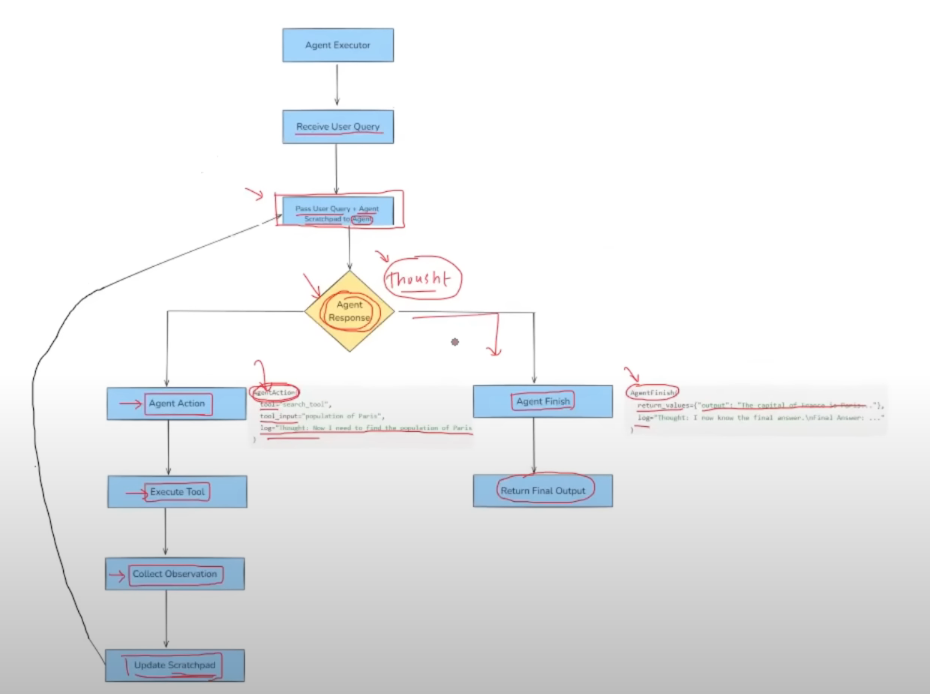

In [32]:
# Tool to call wheather API and get the weather data
@tool
def get_weather_data(city:str) -> dict:
    "Get weather details for a given city"
    api_key = os.getenv('WEATHER_API_KEY')  # Replace with your API key
    url = f'https://api.weatherstack.com/current?access_key={api_key}&query={city}'
    response = requests.get(url)
    return response.json()['current']

In [33]:
tools = [search_tool,get_weather_data]
tools

[DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text')),
 StructuredTool(name='get_weather_data', description='Get weather details for a given city', args_schema=<class 'langchain_core.utils.pydantic.get_weather_data'>, func=<function get_weather_data at 0x0000020AFF71E520>)]

In [35]:
agent = create_react_agent(
    llm=llm,
    tools = tools,
    prompt=prompt
)

In [36]:
executor = AgentExecutor(
    agent=agent,
    tools = tools,
    verbose=True
)

In [40]:
response = executor.invoke({
    'input':'What is weather today in karnataka capital?'
})



> Entering new AgentExecutor chain...
Thought: To answer the question about the weather in Karnataka capital, I'll need to get the capital city of Karnataka first.

Action: get_weather_data
Action Input: Bengaluru{'observation_time': '07:09 PM', 'temperature': 24, 'weather_code': 113, 'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0008_clear_sky_night.png'], 'weather_descriptions': ['Clear '], 'astro': {'sunrise': '05:57 AM', 'sunset': '06:35 PM', 'moonrise': '12:59 PM', 'moonset': '01:09 AM', 'moon_phase': 'Waxing Gibbous', 'moon_illumination': 54}, 'air_quality': {'co': '2867.5', 'no2': '68.45', 'o3': '88', 'so2': '24.975', 'pm2_5': '59.385', 'pm10': '66.97', 'us-epa-index': '3', 'gb-defra-index': '3'}, 'wind_speed': 16, 'wind_degree': 141, 'wind_dir': 'SE', 'pressure': 1015, 'precip': 0, 'humidity': 69, 'cloudcover': 25, 'feelslike': 26, 'uv_index': 0, 'visibility': 6, 'is_day': 'no'}Thought: Now that I have the weather data for Bengaluru, K

In [42]:
response['output']

"The weather today in Karnataka's capital is clear, with a temperature of 24°C, and a wind speed of 16 km/h from the southeast."

In [43]:
response = executor.invoke({"input": "Find the capital of Madhya Pradesh, then find it's current weather condition"})



> Entering new AgentExecutor chain...
Thought: I need to find the capital of Madhya Pradesh first, and then use that information to get the current weather conditions.

Action: duckduckgo_search
Action Input: "capital of Madhya Pradesh"Madhya Pradesh is a state in central India with no coastline or international border. Its capital is Bhopal, and it has diverse geography, climate, and culture. Bhopal, city, capital of Madhya Pradesh state, central India. Situated in the fertile plain of the Malwa Plateau, the city lies just north of the Vindhya Range, along the slopes of a sandstone ridge. It is a major rail junction and has an airport. Pop. (2001) 1,437,354; (2011) 1,798,218. Bhopal was Indore (/ ɪ n ˈ d ɔːr / ⓘ; ISO: Indaura, Hindi: [ɪn̪d̪ɔːr]) is the largest and most populous city in the Indian state of Madhya Pradesh. [15] It is the commercial hub of Madhya Pradesh. It is consistently ranked as the cleanest city in India. [16] It serves as the headquarters of both the Indore Dist